_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [4]:
result

<Response [200]>

In [5]:
type(result)

requests.models.Response

In [6]:
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [7]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [9]:
soup

<!DOCTYPE html>
<html>
<head>
<title>Talks | PyCon 2019 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2019/site_media/static/css/slight.673caeca693d.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" property="og:image"/>
<link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script>
  

In [10]:
type(soup)

bs4.BeautifulSoup

In [11]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [12]:
type(soup.select('h2'))

list

In [13]:
len(soup.select('h2'))

95

In [0]:
first = soup.select('h2')[0]

In [15]:
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [16]:
type(first)

bs4.element.Tag

In [17]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [18]:
type(first.text)

str

In [19]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [20]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
#This...
titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)
  
# ... is the same as this:

titles = [tag.text.strip()
         for tag in soup. select('h2')]


In [22]:
type(titles),len(titles)

(list, 95)

In [23]:
titles[0],titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [24]:
long_titles = []
for title in titles:
  if len(title) > 80:
    #print(title)
    long_titles.append(title)
    
long_titles    

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [25]:
[title for title in titles if len(title) > 80]

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [26]:
def long(title):
  return len(title)>80
long('Python is good!')

False

In [27]:
def long(title):
  return len(title)>80
long('Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline')

True

In [28]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [29]:
#rarely used
filter(lambda t: len(t)> 80,titles)

In [30]:
#rarely used
list(filter(lambda t: len(t)> 80,titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [32]:
df = pd.DataFrame({'title':titles})

df.shape

(95, 1)

In [33]:
df[df['title'].str.len()>80]

,title
29,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
37,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
42,"How to engage Python contributors in the long term? Tech is easy, people are hard."
47,Lessons learned from building a community of Python users among thousands of analysts
49,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
59,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
65,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [34]:
df['title']

0                                         5 Steps to Build Python Native GUI Widgets for BeeWare
1                               8 things that happen at the dot:  Attribute Access & Descriptors
2                                              Account Security Patterns: How Logged-In Are you?
3                                                      Ace Your Technical Interview Using Python
4                                       Advanced asyncio: Solving Real-world Production Problems
5                                          A Guide to Software Engineering for Visually Impaired
6                                          A Medieval DSL? Parsing Heraldic Blazons with Python!
7                                                                 A New Era in Python Governance
8                                                                    API Evolution the Right Way
9                                    A Right Stitch-up: Creating embroidery patterns with Pillow
10                            

In [35]:
df['title'].str.len()

0     54
1     64
2     49
3     41
4     56
5     53
6     53
7     30
8     27
9     59
10    52
11    41
12    37
13    62
14    74
15    35
16    43
17    66
18    36
19    80
20    62
21    41
22    27
23    29
24    31
25    54
26    43
27    59
28    48
29    89
      ..
65    82
66    35
67    21
68    57
69    27
70    66
71    46
72    57
73    33
74    46
75    56
76    30
77    30
78    32
79    56
80    59
81    77
82    23
83    71
84    90
85    79
86    73
87    47
88    56
89    23
90    42
91    45
92    24
93    57
94    68
Name: title, Length: 95, dtype: int64

In [36]:
df['title'].str.len()>80

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
      ...  
65     True
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84     True
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: title, Length: 95, dtype: bool

In [37]:
condition = df['title'].str.len()>80
df[condition]

,title
29,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
37,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
42,"How to engage Python contributors in the long term? Tech is easy, people are hard."
47,Lessons learned from building a community of Python users among thousands of analysts
49,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
59,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
65,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df['title'].apply(len)

In [39]:
df.shape

(95, 2)

In [40]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [41]:
df[df['title length'] > 80]

,title,title length
29,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
37,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
42,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
47,Lessons learned from building a community of Python users among thousands of analysts,85
49,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
59,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
65,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [42]:
df.loc[df['title length']> 80, 'title length']

29    89
37    81
42    82
47    85
49    82
59    95
65    82
84    90
Name: title length, dtype: int64

In [43]:
df.loc[df['title length']> 80, 'title']

29          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
37                  Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
42                 How to engage Python contributors in the long term? Tech is easy, people are hard.
47              Lessons learned from building a community of Python users among thousands of analysts
49                 Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
59    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
65                 Put down the deep learning: When not to use neural networks and what to do instead
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
Name: title, dtype: object

### long title

In [44]:
df['long title']=df['title length']>80
df.shape


(95, 3)

In [45]:
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [46]:
df[df['long title']==True]

,title,title length,long title
29,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
37,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
42,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
47,Lessons learned from building a community of Python users among thousands of analysts,85,True
49,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
59,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
65,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [47]:
df[df['long title']]

,title,title length,long title
29,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
37,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
42,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
47,Lessons learned from building a community of Python users among thousands of analysts,85,True
49,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
59,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
65,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [48]:
df[df['long title']==False]

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


In [49]:
df[df['long title']!=True]

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


In [50]:
df[~df['long title']]

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


### first letter

In [51]:
'Python is great!'[-1]

'!'

In [52]:
'Python is great!'[0]

'P'

In [53]:
df['title'].str[0]

0     5
1     8
2     A
3     A
4     A
5     A
6     A
7     A
8     A
9     A
10    A
11    A
12    A
13    B
14    B
15    B
16    B
17    B
18    B
19    C
20    C
21    D
22    D
23    D
24    D
25    E
26    E
27    E
28    E
29    ¡
     ..
65    P
66    P
67    P
68    R
69    R
70    S
71    S
72    S
73    S
74    S
75    S
76    T
77    T
78    T
79    T
80    T
81    T
82    T
83    T
84    T
85    T
86    T
87    T
88    t
89    T
90    U
91    W
92    W
93    W
94    W
Name: title, Length: 95, dtype: object

In [0]:
df['first letter'] = df['title'].str[0]

In [55]:
df[df['first letter']=='P']

,title,title length,long title,first letter
60,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
61,Plugins: Adding Flexibility to Your Apps,40,False,P
62,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
63,Practical decorators,20,False,P
64,Programmatic Notebooks with papermill,37,False,P
65,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
66,"Python on Windows is Okay, Actually",35,False,P
67,Python Security Tools,21,False,P


In [56]:
'Python is great!'.startswith('P')

True

In [57]:
'Hello world!'.startswith('P')

False

In [58]:
df[df['title'].str.startswith('P')]

,title,title length,long title,first letter
60,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
61,Plugins: Adding Flexibility to Your Apps,40,False,P
62,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
63,Practical decorators,20,False,P
64,Programmatic Notebooks with papermill,37,False,P
65,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
66,"Python on Windows is Okay, Actually",35,False,P
67,Python Security Tools,21,False,P


In [59]:
df[df['title'].str.contains('neural')]

,title,title length,long title,first letter
65,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P


In [60]:
df[df['title'].str.contains('Neural')]

,title,title length,long title,first letter


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [61]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 8.6MB/s 


In [0]:
import textstat

In [63]:
df['title'].apply(textstat.lexicon_count)

0     10
1     10
2      7
3      6
4      6
5      8
6      8
7      6
8      5
9      8
10     9
11     7
12     4
13     7
14    11
15     5
16     6
17     7
18     7
19    13
20    10
21     6
22     4
23     5
24     7
25     6
26     6
27     9
28     6
29    12
      ..
65    16
66     6
67     3
68     9
69     4
70     9
71     7
72     9
73     5
74     6
75     7
76     6
77     5
78     6
79     9
80     9
81    14
82     5
83    13
84    15
85    15
86    11
87     8
88    11
89     4
90     4
91    12
92     5
93     8
94    12
Name: title, Length: 95, dtype: int64

In [0]:
#new column
df['title word count'] = df['title'].apply(textstat.lexicon_count)

In [65]:
df.shape

(95, 5)

In [66]:
df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [67]:
df[df['title word count']<= 3]

,title,title length,long title,first letter,title word count
55,Measuring Model Fairness,24,False,M,3
63,Practical decorators,20,False,P,2
67,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [100]:
df.head()

,description,description character count,long title,first letter,description word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [0]:
df = df.rename(columns={'description character count':'title character count','description': 'title','description word count':'title word count'})

In [188]:
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [189]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,51.578947,8.021053
std,17.643985,3.205643
min,20.000000,2.000000
25%,38.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [190]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Break the Cycle: Three excellent Python tools to automate repetitive tasks,NaN,False,T,NaN
freq,1,NaN,87,13,NaN
mean,NaN,51.578947,NaN,NaN,8.021053
std,NaN,17.643985,NaN,NaN,3.205643
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,38.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [191]:
df.describe(exclude='number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Break the Cycle: Three excellent Python tools to automate repetitive tasks,False,T
freq,1,87,13


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [192]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,51.578947,8.021053
std,17.643985,3.205643
min,20.000000,2.000000
25%,38.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [193]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
63,Practical decorators,20,False,P,2
67,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
55,Measuring Model Fairness,24,False,M,3


In [194]:
df.sort_values(by='title character count').head(5)['title']

63        Practical decorators
67       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
55    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [0]:
#REVERSE, reverse, reverse alphabetically

df.sort_values(by='first letter',ascending=False)

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [211]:
df['first letter'].value_counts()

T    13
A    11
P     8
M     8
E     7
S     6
B     6
H     5
L     4
G     4
D     4
W     4
F     3
C     2
I     2
R     2
8     1
U     1
¡     1
5     1
t     1
O     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [212]:
df['long title'].value_counts()

False    87
True      8
Name: long title, dtype: int64

In [213]:
df['long title'].value_counts() / 95

False    0.915789
True     0.084211
Name: long title, dtype: float64

In [214]:
df['long title'].value_counts() / len(df)

False    0.915789
True     0.084211
Name: long title, dtype: float64

In [215]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

In [0]:
df['first letter']

In [0]:
df['first letter'].value_counts()

In [218]:
df['first letter'].value_counts().head(5)

T    13
A    11
P     8
M     8
E     7
Name: first letter, dtype: int64

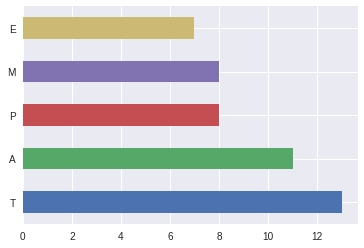

In [219]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot.barh());

#the ; suppresses the line of matplotlib data

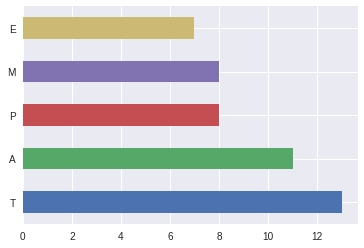

In [220]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot.barh())

#the ; suppresses the line of matplotlib axes data

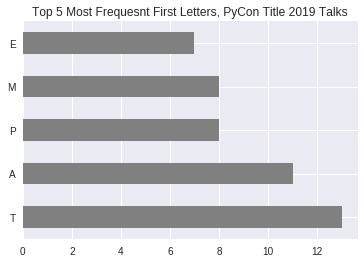

In [221]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot.barh(color='grey',
           title='Top 5 Most Frequesnt First Letters, PyCon Title 2019 Talks'));


Histogram of title lengths, in characters

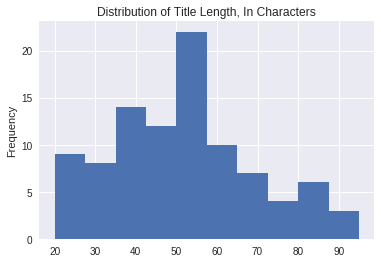

In [227]:
title = 'Distribution of Title Length, In Characters'

df['title character count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


**04.02.19 - Stretch Challenge - SCROLL DOWN**

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [0]:
soup

In [234]:
type(soup)

bs4.BeautifulSoup

In [0]:
soup.select('div.presentation-description')

In [0]:
first = soup.select('div.presentation-description')[0]

In [237]:
first

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>

In [238]:
first.text.strip()

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [239]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Break the Cycle: Three excellent Python tools to automate repetitive tasks,NaN,False,T,NaN
freq,1,NaN,87,13,NaN
mean,NaN,51.578947,NaN,NaN,8.021053
std,NaN,17.643985,NaN,NaN,3.205643
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,38.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [0]:
#df.head()

In [0]:
df = df.rename(columns={'title':'description'})
df = df.rename(columns={'title character count':'description character count'})
df = df.rename(columns={'title word count':'description word count'})

In [242]:
df.head()

,description,description character count,long title,first letter,description word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [243]:
df.describe(include='all')

,description,description character count,long title,first letter,description word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Break the Cycle: Three excellent Python tools to automate repetitive tasks,NaN,False,T,NaN
freq,1,NaN,87,13,NaN
mean,NaN,51.578947,NaN,NaN,8.021053
std,NaN,17.643985,NaN,NaN,3.205643
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,38.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


Average description word count is 8 words.  (Rounding up 7.978)

Minimum description word count is 2 words.

Maximum description word count is 19 words.

All descriptions could fit in a tweet since they are all less than or equal to 140 characters.  Will represent in code form below.

In [0]:
df[df['description character count'] <= 140]

# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [253]:
df.describe(include='all')

,description,description character count,long title,first letter,description word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Break the Cycle: Three excellent Python tools to automate repetitive tasks,NaN,False,T,NaN
freq,1,NaN,87,13,NaN
mean,NaN,51.578947,NaN,NaN,8.021053
std,NaN,17.643985,NaN,NaN,3.205643
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,38.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [256]:
#df['description grade level'] = df['description grade level',]

#loop text from description first

#textstat.flesch_kincaid_grade(df['description'][0])



3.7

In [0]:
#[ expression for item in list if conditional ]

# for item in flesch_kincaid_grade.description


In [257]:
!pip install textstat
import textstat

In [0]:
 [textstat.flesch_kincaid_grade(item) for item in df['description'] ]

In [0]:
df['description grade level'] = df.description.apply(textstat.flesch_kincaid_grade)

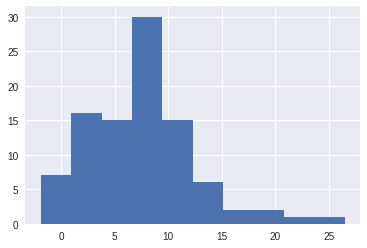

In [264]:
df['description grade level'].hist();